In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

# for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [2]:
tcs = pd.read_csv(r'C:\Users\Puneet Goyal\Downloads\projects vs\tcs.csv')
tcs.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [3]:
tcs.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of        Date   Open   High    Low  Close  Adj Close  Volume
0     False  False  False  False  False      False   False
1     False  False  False  False  False      False   False
2     False  False  False  False  False      False   False
3     False  False  False  False  False      False   False
4     False  False  False  False  False      False   False
...     ...    ...    ...    ...    ...        ...     ...
4489  False  False  False  False  False      False   False
4490  False  False  False  False  False      False   False
4491  False  False  False  False  False      False   False
4492  False  False  False  False  False      False   False
4493  False  False  False  False  False      False   False

[4494 rows x 7 columns]>

In [4]:
tcs.dropna(inplace=True)
print(tcs)

            Date         Open         High          Low        Close   
0     2004-08-27   122.800003   122.800003   119.820000   120.332497  \
1     2004-08-30   121.237503   123.750000   120.625000   123.345001   
2     2004-08-31   123.312500   123.750000   122.000000   123.512497   
3     2004-09-01   123.750000   124.375000   122.949997   123.487503   
4     2004-09-02   123.737503   125.574997   123.250000   124.207497   
...          ...          ...          ...          ...          ...   
4489  2022-10-18  3150.000000  3155.350098  3128.550049  3144.699951   
4490  2022-10-19  3159.000000  3159.000000  3112.000000  3121.850098   
4491  2022-10-20  3105.000000  3160.000000  3105.000000  3157.300049   
4492  2022-10-21  3157.800049  3160.399902  3127.000000  3137.399902   
4493  2022-10-24  3170.100098  3178.000000  3155.000000  3161.699951   

        Adj Close      Volume  
0       88.088272  30646000.0  
1       90.293549  24465208.0  
2       90.416122  21194656.0  
3      

In [5]:
tcs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4486 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4486 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 280.4+ KB


In [6]:
tcs['Date'] = pd.to_datetime(tcs['Date'])              # converts date as a datetime from string.

In [7]:
print(f'Dataframe contains stock prices between {tcs.Date.min()} {tcs.Date.max()}') 
print(f'Total days = {(tcs.Date.max()  - tcs.Date.min()).days} days')

Dataframe contains stock prices between 2004-08-27 00:00:00 2022-10-24 00:00:00
Total days = 6632 days


In [8]:
tcs.iloc[:,1:].describe()

,Open,High,Low,Close,Adj Close,Volume
count,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03
mean,1146.182768,1158.538059,1132.825428,1145.521462,1049.456965,3.620596e+06
std,994.070086,1003.010607,984.043404,993.346465,992.062558,3.162368e+06
min,112.000000,116.112503,103.837502,111.550003,86.565590,0.000000e+00
25%,290.693748,295.300010,285.931259,290.275009,219.902748,1.942489e+06
50%,977.450012,995.000000,970.250000,981.337524,820.627839,2.804749e+06
75%,1564.774963,1597.287476,1548.662537,1576.781219,1443.631561,4.297410e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3964.502686,8.806715e+07


<Axes: >

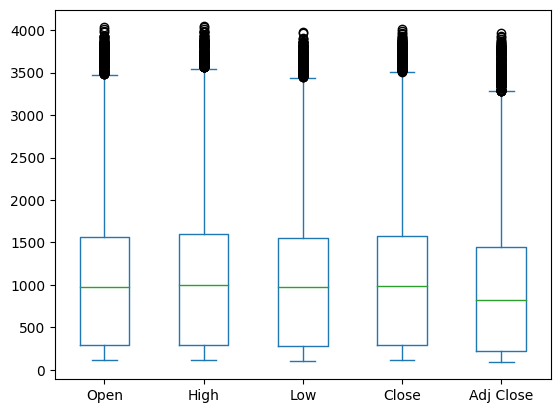

In [9]:
tcs.iloc[:,1:-1].plot(kind='box')

In [10]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of TCS',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Calibri',
            size=20,
            color='#000000'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Calibri',
            size=20,
            color='#000000'
        )
    )
)

tcs_data = [{'x':tcs['Date'], 'y':tcs['Close']}]
plot = go.Figure(data=tcs_data, layout=layout)

In [11]:
#plot(plot) #plotting offline
iplot(plot)

In [12]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [13]:
#Split the data into train and test sets
X = np.array(tcs.index).reshape(-1,1)
Y = tcs['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [14]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [17]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tcs_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tcs_data, layout=layout)

In [18]:
iplot(plot2)

In [19]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8395856535206154	0.8410933493347492
MSE       156743.7937259646	160242.21556073523

